<h3>Linear Regression</h3>
<h4>Packages Used</h4>
<ul>
    <li>numpy</li>
    <li>matplotlib</li>
</ul>
<h3>Import necessary packages</h3>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]

<h3>ReadData(data,separator): Helper function to read data</h3>
<h4> Assumes data is of the form X[0], X[1], ..., X[n], Y</h4>
<h5>Where X[i] is a feature and Y is the label</h5> 

In [3]:
def ReadData(data, separator):
    
    XY = np.genfromtxt(data, delimiter=separator)
    m = XY.shape[0]
    Y = XY[:, -1].reshape(m, 1)
    X = XY[:, 0:-1]
    bias = np.zeros((1, 1))
    theta = np.zeros((X.shape[1], 1))
    return X, Y, m, bias, theta

<h3>Normalize(data): Helper function to Normalize data</h3>

In [4]:
def Normalize(data):
    
    Mu = np.mean(X, axis=0, keepdims=True)
    Sigma = np.std(X, axis=0, keepdims=True)
    data = ((data-Mu)/Sigma)
    return data, Mu, Sigma

<h3>GradDescent_CostCalc(iter1,X,theta,bias,Y,learningratebym,costweight): Function to calculate costs, final theata, biases using Gradient Descent</h3>

In [5]:
def GradDescent_CostCalc(iter1, X, theta, bias, Y, learningratebym, costweight):
    costs = []
    for i in range(iter1):
        H = np.dot(X, theta) + bias
        diff = H - Y
        delta = learningratebym * np.dot(diff.T, X).T
        theta = theta - delta
        bias = bias - (learningratebym * np.sum(diff,keepdims = True))
        J = costweight * sum(np.square(diff))
        costs.append(J.item(0))
    return costs, bias, theta

<h3>CostCalc(X,theta,bias,Y,costweight): Function to calculate cost</h3>

In [6]:
def CostCalc(X, theta, bias, Y, costweight):

    H = np.dot(X, theta) + bias
    diff = H - Y
    J = costweight * sum(np.square(diff))
    return J

<h3>PlotData(Original_X,Normalized_X,Y,trainedtheta,trainedbias,costs,fignumber=1): Helper function to Plot data,predicted target and costs</h3>

In [7]:
def PlotData(Original_X, Normalized_X, Y, trainedtheta, trainedbias, costs, fignumber=1):
    plt.style.use('ggplot')
    fig = plt.figure(fignumber)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Original_X[:,0], Original_X[:,1], Y[:,0], marker = '*', c='#ef0909')
    Y = np.linspace(min(Original_X[:,1]), max(Original_X[:,1]), 5)
    X = np.linspace(min(Original_X[:,0]), max(Original_X[:,0]), 100)
    X1 = np.array([ (i,j) for i in X for j in Y])
    Z = np.dot(Normalize(X1)[0],trainedtheta) + trainedbias
    X, Y = np.meshgrid(X, Y, sparse=False, indexing='ij')
    ax.scatter(X, Y, Z, marker = '*', c='#493d35')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_zlabel('Label')
    
    plt.figure(fignumber+1)
    plt.ylabel('Cost')
    plt.xlabel('Iteration')
    plt.plot(range(iter1),costs, '-')
    return

<h2>Main Code below</h2>

For population = 1650, we predict a profit of 292679.0716800462


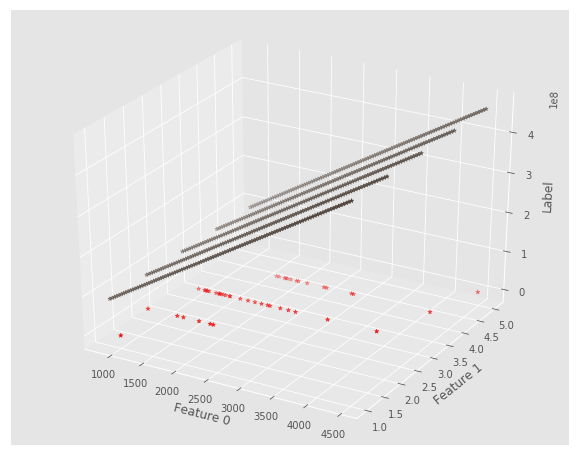

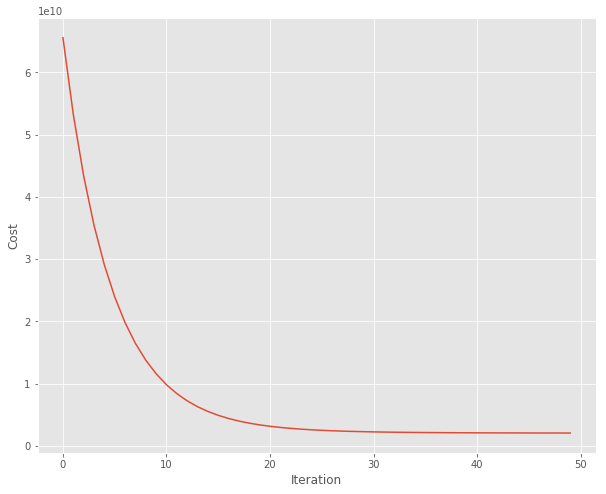

In [8]:
X, Y, m, bias, theta = ReadData('LinRegDS2.txt', ',')
Original_X = X
X, Mu, Sigma = Normalize(X)
learningrate = 0.1
iter1 = 50
learningratebym = learningrate/m
costweight = 1/(2*m)
costs, trainedbias, trainedtheta = GradDescent_CostCalc(iter1, X, theta, bias, Y,
                                                        learningratebym, costweight)
PlotData(Original_X, X, Y, trainedtheta, trainedbias, costs)
actual_input = np.array([1650,3]).reshape(1, 2)
normalized_input = (actual_input-Mu)/Sigma
print(f'For population = {actual_input.item(0)},'
      f' we predict a profit of {(trainedbias + np.dot(normalized_input, trainedtheta)).item(0)}')